In [1]:
pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('covid.csv')
data.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)

In [4]:
X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))
print(X)
print(Y)

[[1 1 1 0 1 1]
 [1 1 2 0 1 0]
 [1 0 2 0 1 1]
 [1 0 2 0 0 1]
 [1 2 0 0 1 1]
 [1 2 2 0 1 0]
 [2 1 1 0 1 1]
 [2 0 2 0 1 1]
 [2 0 2 0 0 0]
 [2 2 0 0 1 1]
 [2 2 0 0 1 0]
 [0 1 1 1 1 1]
 [0 2 0 1 1 1]
 [0 2 0 1 0 0]
 [0 0 2 1 1 0]
 [1 2 0 0 0 1]
 [2 2 0 0 0 1]
 [0 1 1 1 1 0]
 [2 2 2 0 1 1]
 [2 0 2 0 1 0]
 [2 1 2 0 1 0]
 [1 0 2 0 0 0]
 [1 1 1 0 0 0]
 [0 0 2 1 1 1]
 [0 2 2 1 1 1]]
[1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0]


In [10]:
model = MultinomialNB()

In [11]:
model = MultinomialNB()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.2, random_state = 111)

In [12]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [8]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("\nReport")
print(classification_report(Y_test,y_pred))

Accuracy: 0.8

Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



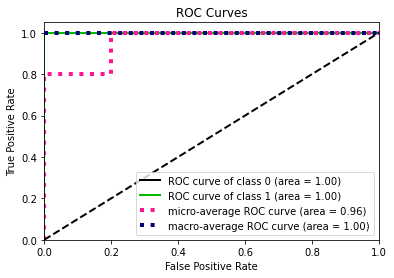

In [9]:
y_prob = model.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, y_prob)
plt.show()